In [3]:
#importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading the file
dataset= pd.read_csv('secondary_data.csv',sep=';')

In [5]:
#using the .shape function we can get dimensionality of the data set.
#dimensionality implies Rows*Columns.
dataset.shape

(22046, 21)

In [6]:
#to see first five entries of the dataset we use .head() function.
dataset.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [7]:
#to check the count no of missing values present in each column of dataframe.
dataset.isnull().sum()

#we are having a lot of null values but we wont directly drop columns because most of our data will be lost as max value for count of null values = 57892.

class                       0
cap-diameter                0
cap-shape                   0
cap-surface              5808
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          2118
gill-spacing             9531
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               17457
stem-surface            11456
stem-color                  0
veil-type               19222
veil-color              18869
has-ring                    0
ring-type                 706
spore-print-color       21340
habitat                     1
season                      1
dtype: int64

In [8]:
#Generate descriptive statistics which can be used to see some relation in data.
#As we see that the description is shown for only 3 variables i.e. numerical value and therefore we got to know that other values are not numerical.
#Therefore we cant fill the NAN/null values with mean.


dataset.describe()

,cap-diameter,stem-height,stem-width
count,22046.000000,22046.000000,22046.000000
mean,5.793251,6.947918,9.513250
std,3.816045,3.705313,6.793148
min,0.380000,1.200000,0.520000
25%,3.070000,4.860000,3.750000
50%,5.160000,6.020000,7.860000
75%,7.677500,7.910000,13.800000
max,25.980000,33.920000,39.270000


In [9]:
dataset.shape       #gives (rows,columns)

(22046, 21)

# a) Data Visualization

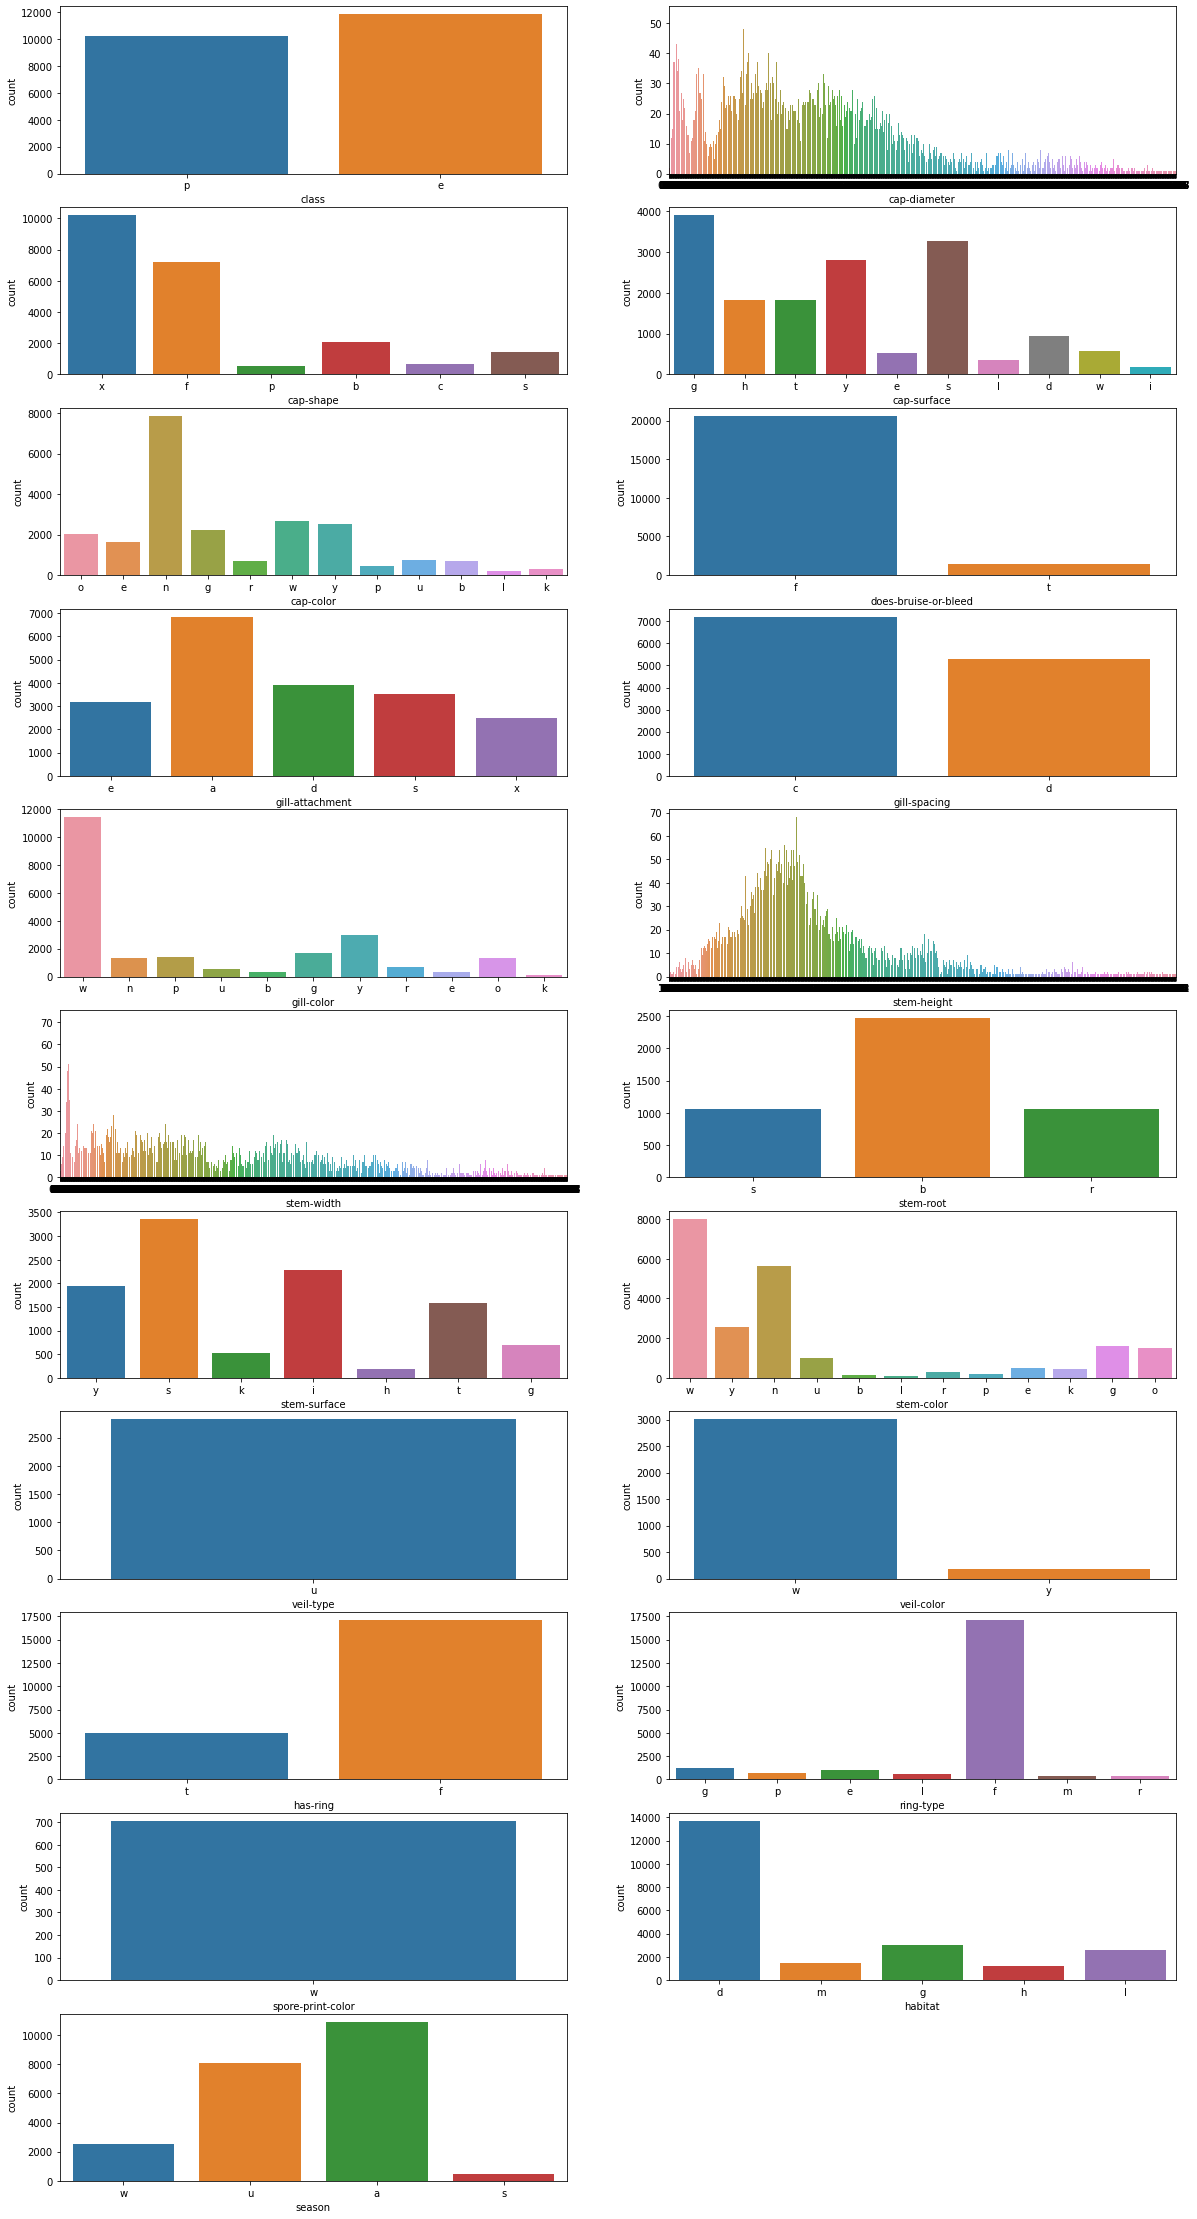

In [10]:
#As we have seen in .describe() that except 3 variables all are categorical therefore we will use countplot i.e. bar plot to visualise the data.
#why count plot? because it is used to check frequency distribution of a categorical variable.

plt.figure(figsize=(20, 40))
columns = list(dataset.columns)
for i in range(len(columns)):
  plt.subplot(11, 2, i+1)
  sns.countplot(dataset[columns[i]])
plt.show()


<Figure size 1440x720 with 0 Axes>

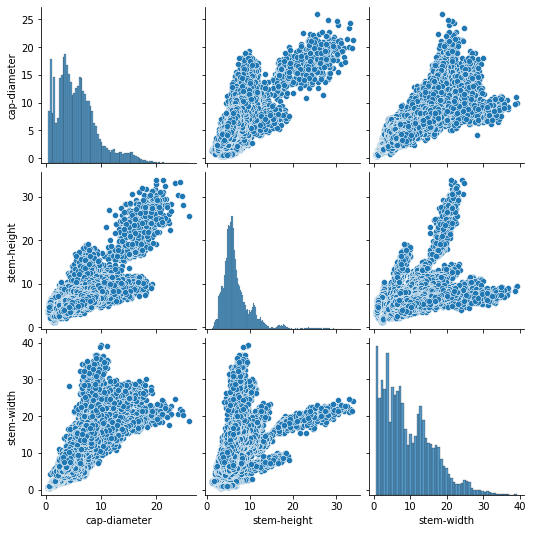

In [11]:
#Pair plots are used to plot pairwise relationships in dataset.
#It creates scatterplot for joint relationship (i.e. different x-axis and y-axis) and histogram for univariate variable (i.e. same x-axis and y-axis )
plt.figure(figsize=(20, 10))
sns.pairplot(dataset)
plt.show()

#b) Impute missing Values

In [12]:
#Earlier we have seen that we have a lot of missing values and we cant directly drop the rows as will affect our database a lot.
#We will replace by mod ie max frequency. 

In [13]:
#we have replaced all values with mode value ie frequency.
#we will find the max_key(mode) from each column seperately and for each column we will fill null values with max_key respectively.

def findMax(dataset, column):                                       #used to find the mode of a column or element with maximum frequency
  X = dict(dataset[column].value_counts())
  max_key = max(zip(X.values(), X.keys()))[1]
  return max_key

columns=dataset.columns

for column in columns:
  key = findMax(dataset, column)
  dataset[column].fillna(str(key), inplace=True)                   #filling null values with mode.

dataset.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [ ]:
#to check relation betweem all variables, we will find corelation between them

def convert_str_into_int(dataset, column):
  dataset[column] = dataset[column].astype('category').cat.codes        #provides category to each categorical variable

columns = list(dataset.columns)

def removing_numerical_values(columns, name):                           #removing the numerical value columns from the column list.
  columns.remove(name) 

for column in columns:
  if dataset.dtypes[column] == 'float64':                               #numerical values has float64 datatype.
    removing_numerical_values(columns, column)

for column in columns:
  convert_str_into_int(dataset, column)

dataset.corr()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
class,1.000000,-0.181139,-0.106309,-0.026163,0.026411,-0.019889,-0.095433,-0.049022,-0.060701,-0.121593,...,0.010271,-0.153862,-0.094772,NaN,-0.147324,0.057559,0.092330,0.032886,-0.041923,-0.054046
cap-diameter,-0.181139,1.000000,0.103923,0.067225,0.042108,0.179440,0.171773,-0.121393,0.221675,0.422560,...,-0.033170,0.047095,0.008670,NaN,-0.008909,0.077024,0.036040,0.032430,-0.125820,0.037305
cap-shape,-0.106309,0.103923,1.000000,-0.067617,0.016312,0.191804,0.046843,-0.038022,0.115703,0.034473,...,-0.018396,0.093628,0.009061,NaN,-0.104224,0.036017,0.146909,0.028906,-0.124754,-0.027178
cap-surface,-0.026163,0.067225,-0.067617,1.000000,0.113660,-0.095095,0.028598,0.050403,-0.025676,0.072723,...,-0.073919,-0.022864,0.118172,NaN,0.056545,0.097993,-0.050511,0.054570,0.068960,0.011643
cap-color,0.026411,0.042108,0.016312,0.113660,1.000000,0.010657,0.007889,-0.008889,0.136560,-0.010732,...,0.108599,-0.005879,0.265525,NaN,0.044010,0.070843,-0.011589,-0.016322,0.031706,0.008443
does-bruise-or-bleed,-0.019889,0.179440,0.191804,-0.095095,0.010657,1.000000,0.046402,-0.147406,0.018613,0.076596,...,0.016033,0.130660,-0.024913,NaN,0.012221,0.019195,0.000692,-0.098297,-0.102747,-0.051146
gill-attachment,-0.095433,0.171773,0.046843,0.028598,0.007889,0.046402,1.000000,0.066664,0.097762,0.071990,...,-0.182089,-0.054743,0.002933,NaN,0.033443,-0.143827,-0.112069,-0.067699,-0.060099,-0.034507
gill-spacing,-0.049022,-0.121393,-0.038022,0.050403,-0.008889,-0.147406,0.066664,1.000000,-0.315955,-0.220753,...,-0.004097,-0.367643,-0.076356,NaN,0.050496,-0.108506,-0.121583,0.010016,-0.010124,0.050540
gill-color,-0.060701,0.221675,0.115703,-0.025676,0.136560,0.018613,0.097762,-0.315955,1.000000,0.157327,...,-0.112247,0.065691,0.149863,NaN,0.111700,-0.055640,-0.009038,0.034672,-0.075768,-0.011360
stem-height,-0.121593,0.422560,0.034473,0.072723,-0.010732,0.076596,0.071990,-0.220753,0.157327,1.000000,...,0.000771,0.237362,0.138458,NaN,-0.071431,0.281049,0.191896,0.008310,-0.020664,-0.020630


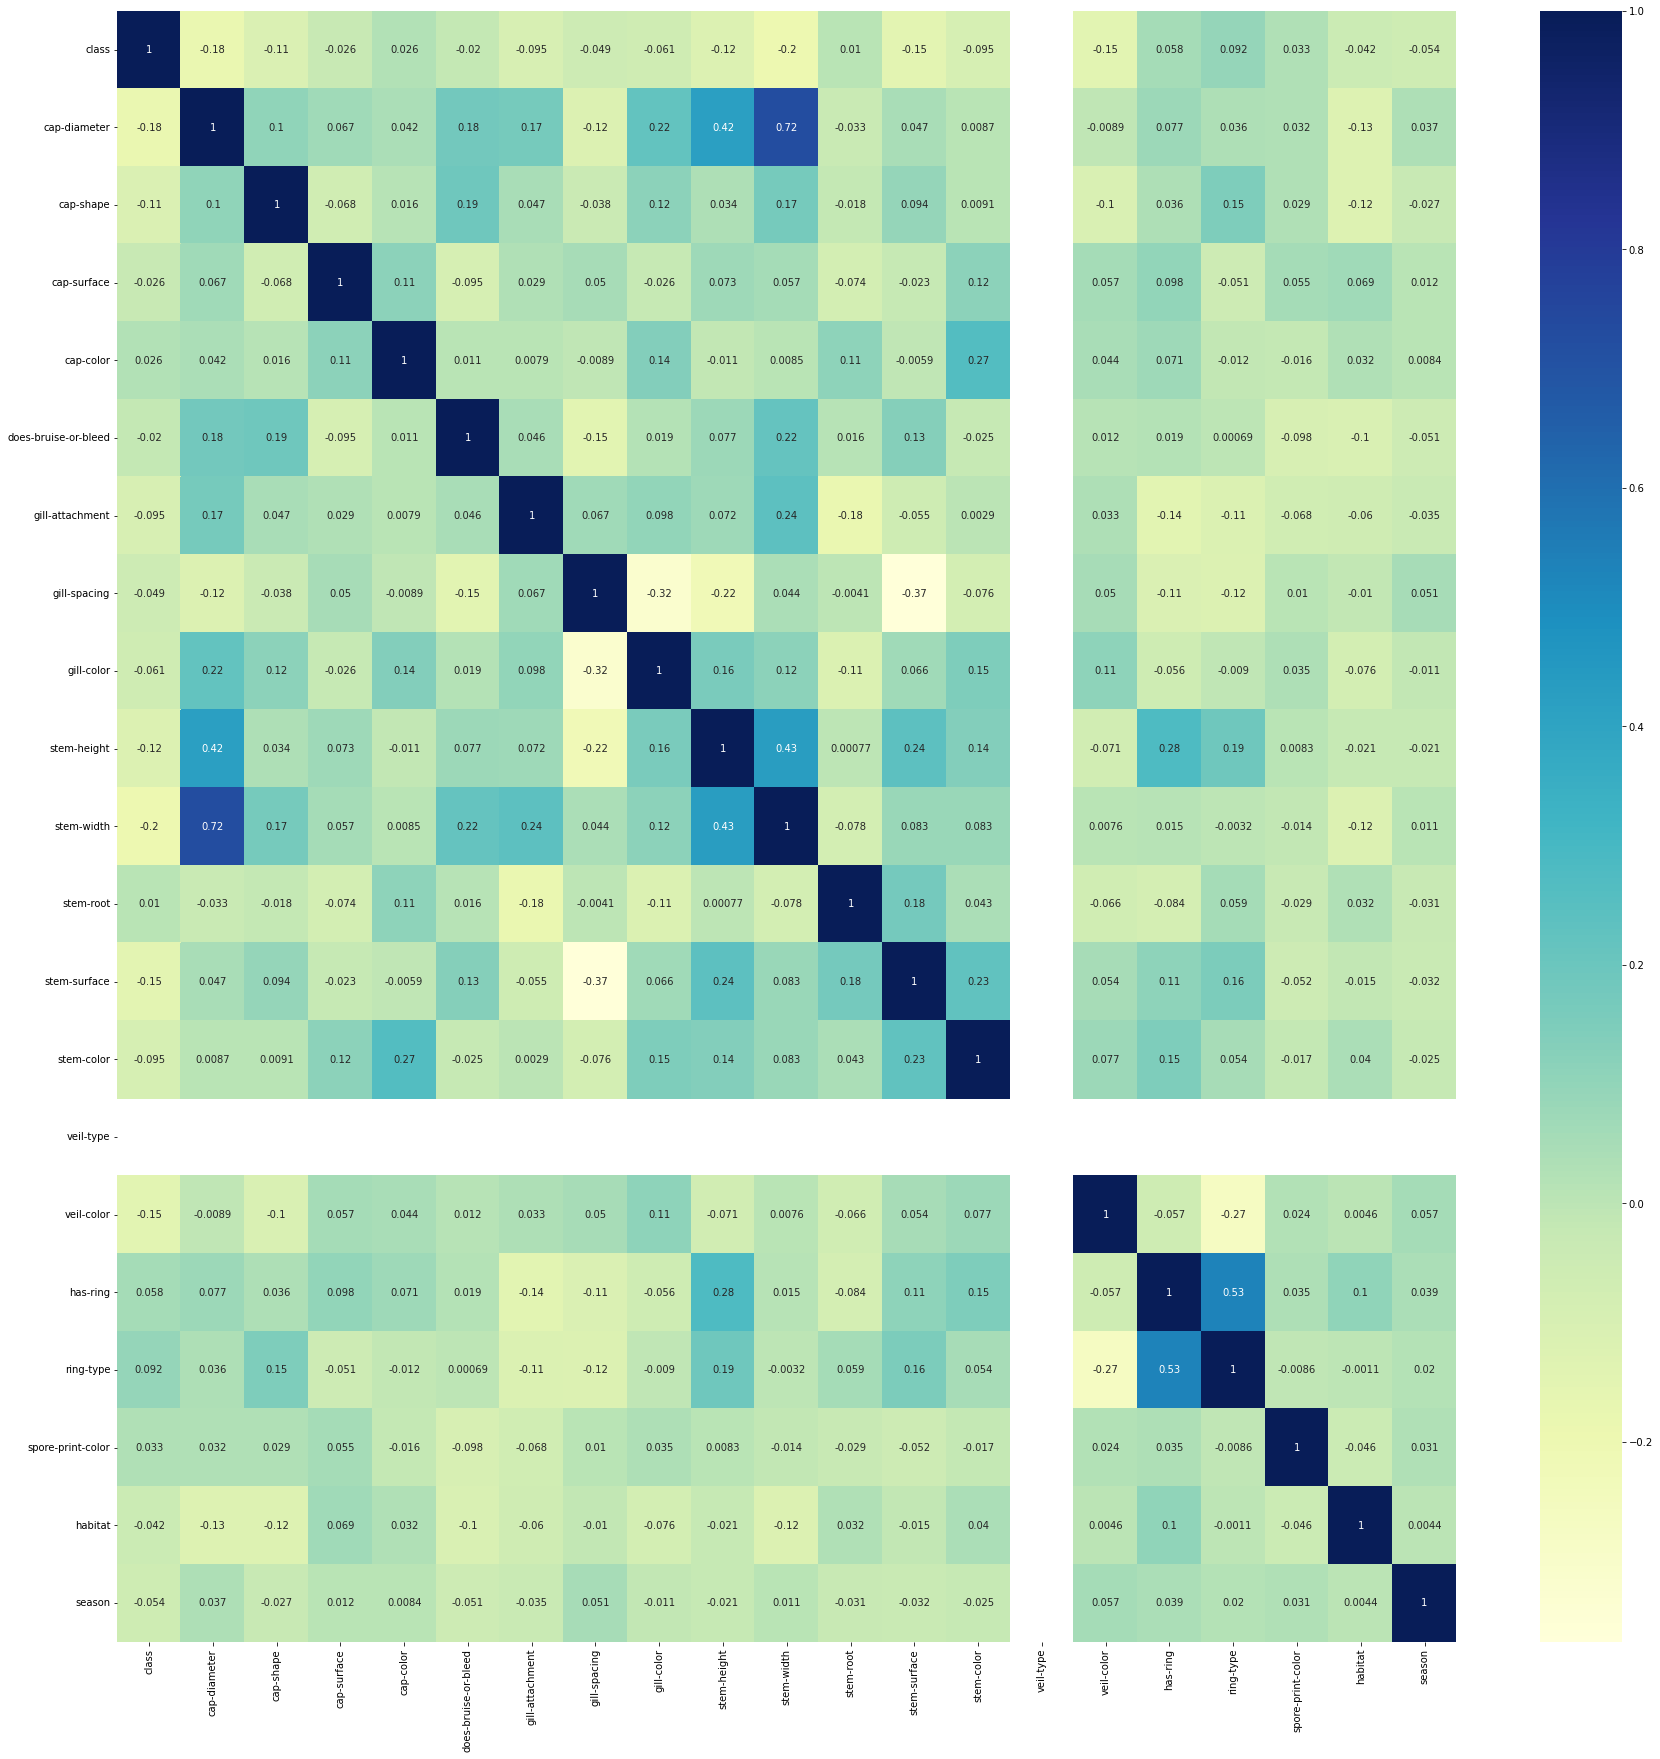

In [ ]:
#Using heatmap, we study correlation between variables i.e. how much two variables are corelated.

plt.figure(figsize=(30, 30))
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Conclusion: 'veil-type' is the redundant predictor variable because there is no correlation of this column with any other column. We can see this from the heatmap as the whole veil-type is blank and hence it a redundant variable. So this variable dosent affects the prediction or the target value.

In [14]:
#In one hot encoding, the categorical parameters will prepare separate columns for all categorical variables.
new_dataset= pd.get_dummies(dataset, drop_first=True)

In [15]:
#to see first five entries of the dataset we use .head() function.
new_dataset.head()


,cap-diameter,stem-height,stem-width,class_p,cap-shape_c,cap-shape_f,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_e,...,ring-type_m,ring-type_p,ring-type_r,habitat_g,habitat_h,habitat_l,habitat_m,season_s,season_u,season_w
0,15.26,16.95,17.09,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,16.60,17.99,18.19,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,14.07,17.80,17.74,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,14.17,15.77,15.98,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,14.64,16.53,17.20,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
